# View all Modtran transmission



In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [45]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [28]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [29]:
import libReadModtran as rt

In [30]:
from os import listdir
from os.path import isfile, join


In [31]:
path_data='data'

In [32]:
files_data = [f for f in listdir(path_data) if isfile(join(path_data, f))]

In [33]:
files_data.sort()

In [34]:
files_selected=[]
for file in files_data:
    if file.find("_reduced")!=-1:
        print "reject ",file
    else:
        files_selected.append(file)
        

reject  Pachon_MODTRAN.10_reduced.7sc
reject  Pachon_MODTRAN.11_reduced.7sc
reject  Pachon_MODTRAN.12_reduced.7sc
reject  Pachon_MODTRAN.13_reduced.7sc
reject  Pachon_MODTRAN.14_reduced.7sc
reject  Pachon_MODTRAN.16_reduced.7sc
reject  Pachon_MODTRAN.17_reduced.7sc
reject  Pachon_MODTRAN.18_reduced.7sc
reject  Pachon_MODTRAN.19_reduced.7sc
reject  Pachon_MODTRAN.20_reduced.7sc
reject  Pachon_MODTRAN.21_reduced.7sc
reject  Pachon_MODTRAN.22_reduced.7sc
reject  Pachon_MODTRAN.23_reduced.7sc
reject  Pachon_MODTRAN.25_reduced.7sc
reject  Pachon_MODTRAN_reduced.7sc


In [35]:
files_selected.sort()

In [43]:
NBFILES=len(files_selected)

In [39]:
all_data=[]
for file in files_selected:
    fullfilename=os.path.join(path_data,file)
    read_modtrandata=rt.loadtape7(fullfilename, colspec = ['WAVELENGTH_NM','COMBIN_TRANS'])
    all_data.append(read_modtrandata)

data/Pachon_MODTRAN.10.7sc
data/Pachon_MODTRAN.11.7sc
data/Pachon_MODTRAN.12.7sc
data/Pachon_MODTRAN.13.7sc
data/Pachon_MODTRAN.14.7sc
data/Pachon_MODTRAN.15.txt
data/Pachon_MODTRAN.16.7sc
data/Pachon_MODTRAN.17.7sc
data/Pachon_MODTRAN.18.7sc
data/Pachon_MODTRAN.19.7sc
data/Pachon_MODTRAN.20.7sc
data/Pachon_MODTRAN.21.7sc
data/Pachon_MODTRAN.22.7sc
data/Pachon_MODTRAN.23.7sc
data/Pachon_MODTRAN.25.7sc
data/Pachon_MODTRAN.7sc


In [42]:
all_data[0].shape

(1701, 2)

In [47]:
jet = cm = plt.get_cmap('jet')
cNorm  = colors.Normalize(vmin=0, vmax=NBFILES)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

Text(0,0.5,'atmospheric transparency')

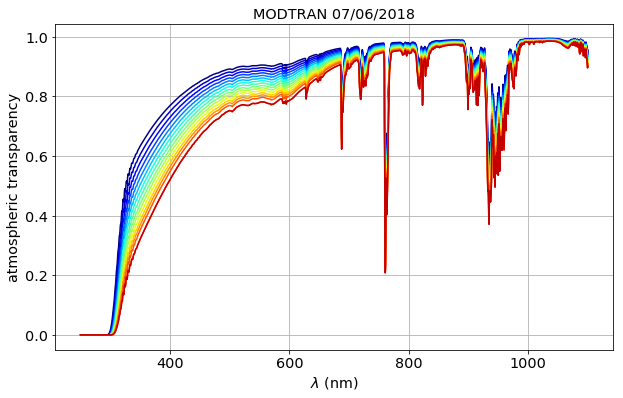

In [53]:
for idx in np.arange(NBFILES):    
    colorVal = scalarMap.to_rgba(idx)
    plt.plot(all_data[idx][:,0],all_data[idx][:,1],color=colorVal)
plt.grid(True)
plt.title("MODTRAN 07/06/2018")
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("atmospheric transparency")